### Data

In [1]:
dft_pbe0 = [40.66008446831256, 0.6809651898220181, -18.309596070088446, -19.946089434437454, 
            -19.716833422891796, -9.942635984160006, -3.8565351190045476, -0.8880439130589366]

dft_pbe = [37.95268661, -3.080466104, -23.51554433, -25.36251784,
          -25.07856692, -13.74706128, -5.670038618, -1.744386551]

dft_pbe0_d2 = [-150.7848768, -151.556592, -136.8906019, -111.4827771,
              -91.30947247, -43.80286467, -25.13788777, -10.67884031]

dft_pbe_d2 = [-153.4924107, -155.3181593, -142.0966862, -116.8993415,
              -96.67134202, -47.60728996, -26.95139126, -11.535319]

rpa = [-29.31372549, -62.17501816, -69.94190269, -66.72476398,
      -57.23311547, -27.15323166, -13.620189, -2.24764]

sheet_distance = [2.9907, 3.1944, 3.3889, 3.5926, 3.7963, 4.5, 5.0093, 6.0093]

### Functions

In [2]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import sem
import matplotlib.pyplot as plt
import random

def RMS(ary1, ary2):
  if (len(ary1) != len(ary2)):
    print("RMS Error: ary1 and ary2 have different dimensions!")
    return -1
  return np.sum(((np.array(ary1) - np.array(ary2)) ** 2 / len(ary1)) ** 0.5)

def findMin(x, y):
  min_Index = np.argmin(y)
  return x[min_Index], y[min_Index]

def bootStrap(distList, eList, degree = 4, no_samples = 100, no_dataInEachRun = 18):
  listOfEQDist = []
  listOfBindingE = []

  for i in range(no_samples):
    thisListOfE = []
    thisListOfDistance = []
    for j in range(no_dataInEachRun):
      index = random.randint(0, len(distList) - 1)
      thisListOfE.append(eList[index])
      thisListOfDistance.append(distList[index])
    this_fit, fitCov = np.polyfit(thisListOfDistance, thisListOfE, degree, full=False, cov=True)
    thisFitX = np.linspace(3.0, 5, 200)
    thisFitFunction = np.poly1d(this_fit)
    thisFitData = thisFitFunction(thisFitX)
    EqDistance, BindingEnergy = findMin(thisFitX, thisFitData )
    listOfEQDist.append(EqDistance)
    listOfBindingE.append(BindingEnergy)
  return np.mean(listOfEQDist), sem(listOfEQDist), np.mean(listOfBindingE), sem(listOfBindingE)



### Code

In [5]:
print("RMS between rpa and dft_pbe0 is    ", RMS(rpa, dft_pbe0))
print("RMS between rpa and dft_pbe is     ", RMS(rpa, dft_pbe))
print("RMS between rpa and dft_pbe0_d2 is ", RMS(rpa, dft_pbe0_d2))
print("RMS between rpa and dft_pbe_d2 is  ", RMS(rpa, dft_pbe_d2))

RMS between rpa and dft_pbe0 is     105.03749577467121
RMS between rpa and dft_pbe is      94.81018233448873
RMS between rpa and dft_pbe0_d2 is  139.02932945648618
RMS between rpa and dft_pbe_d2 is   149.25693145722568


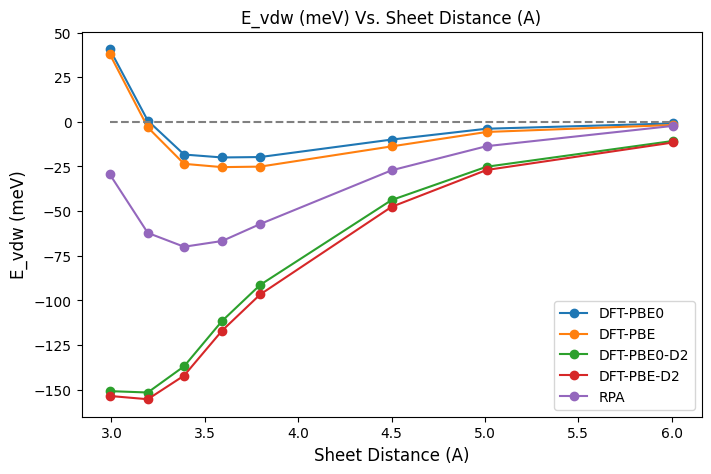

In [7]:
fig, ax = plt.subplots()
plt.title("E_vdw (meV) Vs. Sheet Distance (A)")
ax.set_xlabel('Sheet Distance (A)',fontsize=12)
ax.set_ylabel('E_vdw (meV)',fontsize=12)
ax.plot(sheet_distance, dft_pbe0, "o-",label="DFT-PBE0")
ax.plot(sheet_distance, dft_pbe, "o-",label="DFT-PBE")
ax.plot(sheet_distance, dft_pbe0_d2, "o-",label="DFT-PBE0-D2")
ax.plot(sheet_distance, dft_pbe_d2, "o-",label="DFT-PBE-D2")
ax.plot(sheet_distance, rpa, "o-",label="RPA")
fig.set_size_inches(8, 5)
fig.set_dpi(100)
plt.hlines(y=0, xmin=2.9907, xmax=6.0093, color="grey", linestyles="--")
plt.legend()
plt.show()

### Curve Fit

[    70.72679593  -1140.50806858   6884.03490724 -18421.37463201
  18410.91993802]
4017.1422421572247


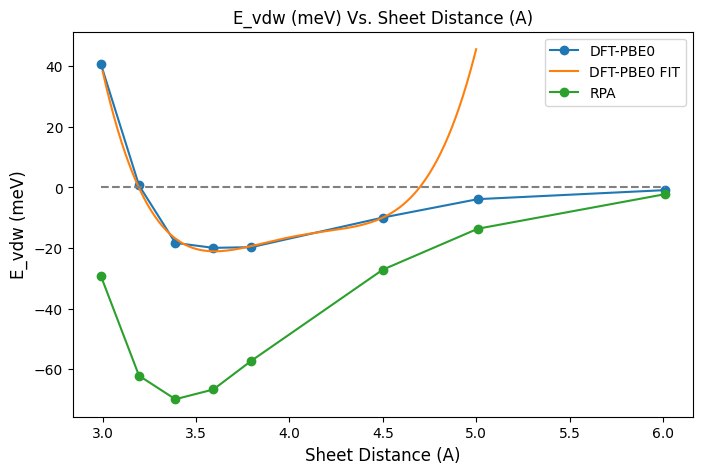

(3.6030150753768844, -21.094259416651767)


In [124]:
pbe0_fit, fitCov = np.polyfit(sheet_distance[0:6], dft_pbe0[0:6], 4, full=False, cov=True)
print(pbe0_fit)
print(fitCov[0][0])

fitX = np.linspace(3.0, 5, 200)
pbe0FitFunction = np.poly1d(pbe0_fit)
pbe0FitData = pbe0FitFunction(fitX)

fig, ax = plt.subplots()
plt.title("E_vdw (meV) Vs. Sheet Distance (A)")
ax.set_xlabel('Sheet Distance (A)',fontsize=12)
ax.set_ylabel('E_vdw (meV)',fontsize=12)
ax.plot(sheet_distance, dft_pbe0, "o-",label="DFT-PBE0")
ax.plot(fitX, pbe0FitData, label="DFT-PBE0 FIT")
ax.plot(sheet_distance, rpa, "o-",label="RPA")
fig.set_size_inches(8, 5)
fig.set_dpi(100)
plt.hlines(y=0, xmin=2.9907, xmax=6.0093, color="grey", linestyles="--")
plt.legend()
plt.show()


def findMin(x, y):
  min_Index = np.argmin(y)
  return x[min_Index], y[min_Index]

print(findMin(fitX, pbe0FitData))

### Bootstrap Resample (DFT-PBE0)

In [16]:

dft_pbe0_dist_mean, dft_pbe0_dist_std, dft_pbe0_E_mean, dft_pbe0_E_std = bootStrap(sheet_distance[0:7], dft_pbe0[0:7], no_samples = 100)
print("DFT-PBE0 Distance avg:", dft_pbe0_dist_mean)
print("   Standard Deviation:", dft_pbe0_dist_std)
print("DFT-PBE0 Energy avg:", dft_pbe0_E_mean)
print("   Standard Deviation:", dft_pbe0_E_std)

DFT-PBE0 Distance avg: 3.6590954773869346
   Standard Deviation: 0.02554352436335524
DFT-PBE0 Energy avg: -22.203927565859413
   Standard Deviation: 0.40765588430168087


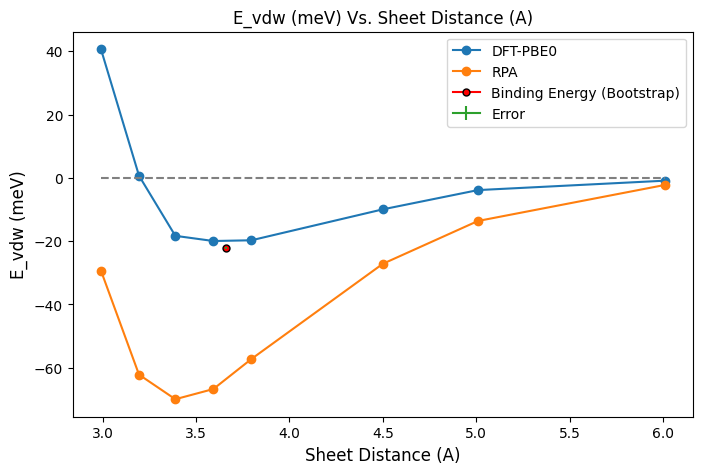

In [17]:
fig, ax = plt.subplots()
plt.title("E_vdw (meV) Vs. Sheet Distance (A)")
ax.set_xlabel('Sheet Distance (A)',fontsize=12)
ax.set_ylabel('E_vdw (meV)',fontsize=12)
ax.plot(sheet_distance, dft_pbe0, "o-",label="DFT-PBE0")
# ax.plot(fitX, pbe0FitData, label="DFT-PBE0 FIT")
ax.plot(sheet_distance, rpa, "o-",label="RPA")
ax.plot(dft_pbe0_dist_mean, dft_pbe0_E_mean, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red", color="red", label="Binding Energy (Bootstrap)")
ax.errorbar(dft_pbe0_dist_mean, dft_pbe0_E_mean, dft_pbe0_E_std, label="Error")
fig.set_size_inches(8, 5)
fig.set_dpi(100)
plt.hlines(y=0, xmin=2.9907, xmax=6.0093, color="grey", linestyles="--")
plt.legend()
plt.show()

### Bootstrap Resample (DFT-PBE)

In [97]:
dft_pbe_dist_mean, dft_pbe_dist_std, dft_pbe_E_mean, dft_pbe_E_std = bootStrap(sheet_distance[0:7], dft_pbe[0:7])
print("DFT-PBE Distance avg:", dft_pbe_dist_mean)
print("   Standard Deviation:", dft_pbe_dist_std)
print("DFT-PBE Energy avg:", dft_pbe_E_mean)
print("   Standard Deviation:", dft_pbe_E_std)

DFT-PBE Distance avg: 3.652562814070352
   Standard Deviation: 0.024457595076736886
DFT-PBE Energy avg: -29.023294951315464
   Standard Deviation: 1.2893716728444073


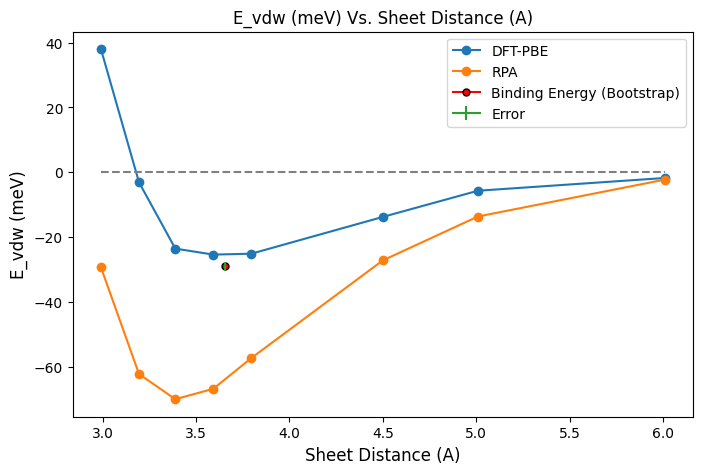

In [98]:
fig, ax = plt.subplots()
plt.title("E_vdw (meV) Vs. Sheet Distance (A)")
ax.set_xlabel('Sheet Distance (A)',fontsize=12)
ax.set_ylabel('E_vdw (meV)',fontsize=12)
ax.plot(sheet_distance, dft_pbe, "o-",label="DFT-PBE")
# ax.plot(fitX, pbe0FitData, label="DFT-PBE0 FIT")
ax.plot(sheet_distance, rpa, "o-",label="RPA")
ax.plot(dft_pbe_dist_mean, dft_pbe_E_mean, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red", color="red", label="Binding Energy (Bootstrap)")
ax.errorbar(dft_pbe_dist_mean, dft_pbe_E_mean, dft_pbe_E_std, label="Error")
fig.set_size_inches(8, 5)
fig.set_dpi(100)
plt.hlines(y=0, xmin=2.9907, xmax=6.0093, color="grey", linestyles="--")
plt.legend()
plt.show()

### Bootstrap Resample (DFT-PBE0-D2)

In [93]:
dft_pbe0D2_dist_mean, dft_pbe0D2_dist_std, dft_pbe0D2_E_mean, dft_pbe0D2_E_std = bootStrap(sheet_distance[0:7], dft_pbe0_d2[0:7])
print("DFT-PBE0-D2 Distance avg:", dft_pbe0D2_dist_mean)
print("   Standard Deviation:", dft_pbe0D2_dist_std)
print("DFT-PBE0-D2 Energy avg:", dft_pbe0D2_E_mean)
print("   Standard Deviation:", dft_pbe0D2_E_std)

DFT-PBE0-D2 Distance avg: 3.0868341708542717
   Standard Deviation: 0.002047865197416673
DFT-PBE0-D2 Energy avg: -154.5012101168027
   Standard Deviation: 0.5519423965600412


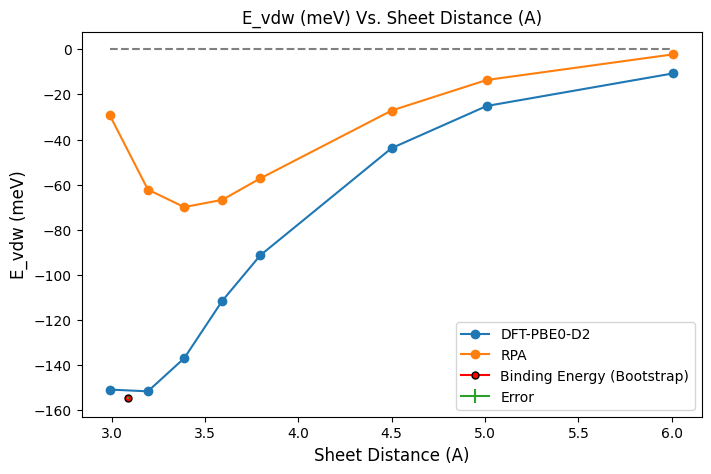

In [94]:
fig, ax = plt.subplots()
plt.title("E_vdw (meV) Vs. Sheet Distance (A)")
ax.set_xlabel('Sheet Distance (A)',fontsize=12)
ax.set_ylabel('E_vdw (meV)',fontsize=12)
ax.plot(sheet_distance, dft_pbe0_d2, "o-",label="DFT-PBE0-D2")
# ax.plot(fitX, pbe0FitData, label="DFT-PBE0 FIT")
ax.plot(sheet_distance, rpa, "o-",label="RPA")
ax.plot(dft_pbe0D2_dist_mean, dft_pbe0D2_E_mean, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red", color="red", label="Binding Energy (Bootstrap)")
ax.errorbar(dft_pbe0D2_dist_mean, dft_pbe0D2_E_mean, dft_pbe0D2_E_std, label="Error")
fig.set_size_inches(8, 5)
fig.set_dpi(100)
plt.hlines(y=0, xmin=2.9907, xmax=6.0093, color="grey", linestyles="--")
plt.legend()
plt.show()

### Bootstrap Resample (DFT-PBE-D2)

In [49]:
dft_pbeD2_dist_mean, dft_pbeD2_dist_std, dft_pbeD2_E_mean, dft_pbeD2_E_std = bootStrap(sheet_distance[0:7], dft_pbe_d2[0:7])
print("DFT-PBE-D2 Distance avg:", dft_pbeD2_dist_mean)
print("   Standard Deviation:", dft_pbeD2_dist_std)
print("DFT-PBE-D2 Energy avg:", dft_pbeD2_E_mean)
print("   Standard Deviation:", dft_pbeD2_E_std)

DFT-PBE-D2 Distance avg: 3.117085427135677
   Standard Deviation: 0.019130108930976414
DFT-PBE-D2 Energy avg: -158.68288853929383
   Standard Deviation: 1.1093879747326532


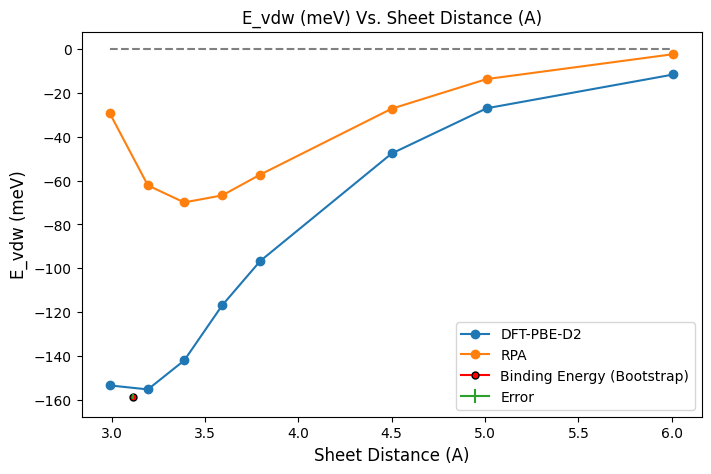

In [50]:
fig, ax = plt.subplots()
plt.title("E_vdw (meV) Vs. Sheet Distance (A)")
ax.set_xlabel('Sheet Distance (A)',fontsize=12)
ax.set_ylabel('E_vdw (meV)',fontsize=12)
ax.plot(sheet_distance, dft_pbe_d2, "o-",label="DFT-PBE-D2")
# ax.plot(fitX, pbe0FitData, label="DFT-PBE0 FIT")
ax.plot(sheet_distance, rpa, "o-",label="RPA")
ax.plot(dft_pbeD2_dist_mean, dft_pbeD2_E_mean, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red", color="red", label="Binding Energy (Bootstrap)")
ax.errorbar(dft_pbeD2_dist_mean, dft_pbeD2_E_mean, dft_pbeD2_E_std, label="Error")
fig.set_size_inches(8, 5)
fig.set_dpi(100)
plt.hlines(y=0, xmin=2.9907, xmax=6.0093, color="grey", linestyles="--")
plt.legend()
plt.show()

### Bootstrap Resample (RPA)

In [109]:
rpa_dist_mean, rpa_dist_std, rpa_E_mean, rpa_E_std = bootStrap(sheet_distance[0:7], rpa[0:7])
print("RPA Distance avg:", rpa_dist_mean)
print("   Standard Deviation:", rpa_dist_std)
print("RPA Energy avg:", rpa_E_mean)
print("   Standard Deviation:", rpa_E_std)

RPA Distance avg: 3.4158793969849244
   Standard Deviation: 0.0007663368589751205
RPA Energy avg: -70.69078947669139
   Standard Deviation: 0.03404627980809993


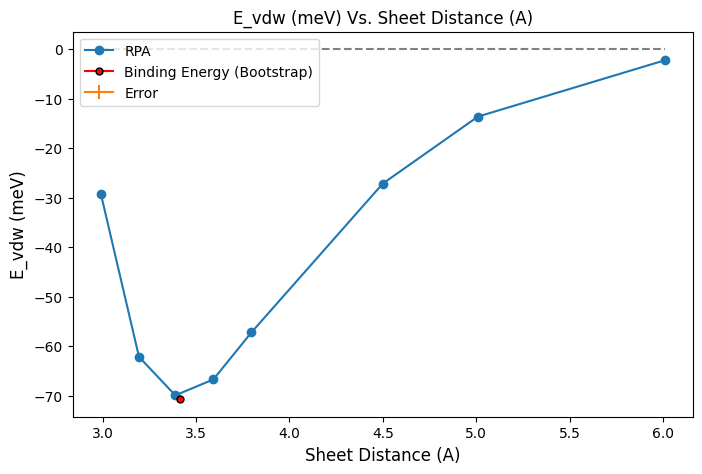

In [110]:
fig, ax = plt.subplots()
plt.title("E_vdw (meV) Vs. Sheet Distance (A)")
ax.set_xlabel('Sheet Distance (A)',fontsize=12)
ax.set_ylabel('E_vdw (meV)',fontsize=12)
ax.plot(sheet_distance, rpa, "o-",label="RPA")
ax.plot(rpa_dist_mean, rpa_E_mean, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red", color="red", label="Binding Energy (Bootstrap)")
ax.errorbar(rpa_dist_mean, rpa_E_mean, rpa_E_std, label="Error")
fig.set_size_inches(8, 5)
fig.set_dpi(100)
plt.hlines(y=0, xmin=2.9907, xmax=6.0093, color="grey", linestyles="--")
plt.legend()
plt.show()

C:\Users\yulig\AppData\Local\Temp\ipykernel_25908\291071112.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(sheet_distance, dft_pbe, "o-r",label="DFT-PBE", color="orange")


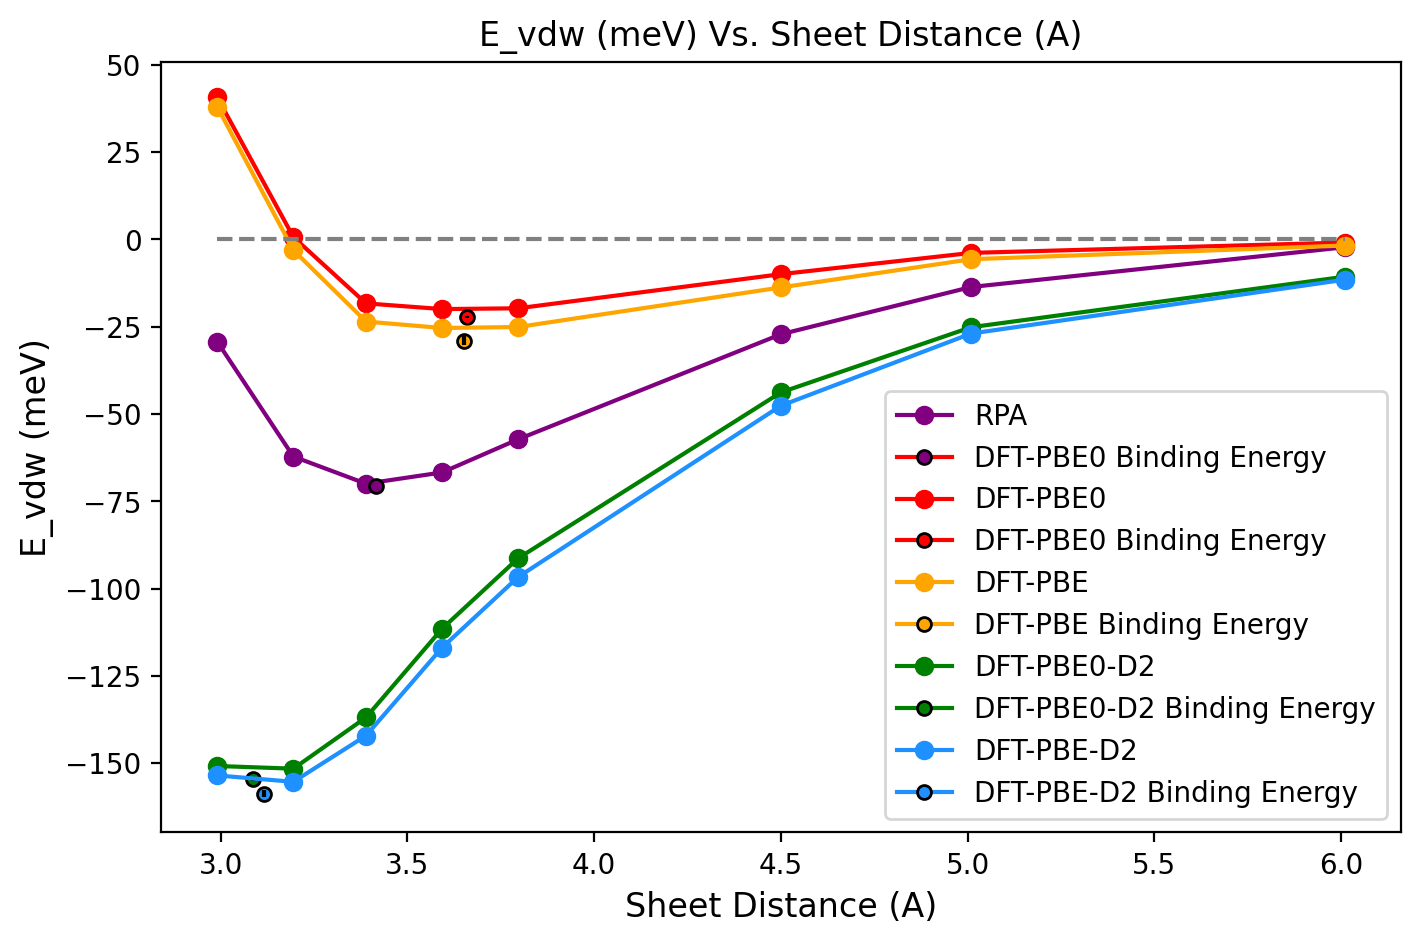

In [111]:
fig, ax = plt.subplots()
plt.title("E_vdw (meV) Vs. Sheet Distance (A)")
ax.set_xlabel('Sheet Distance (A)',fontsize=12)
ax.set_ylabel('E_vdw (meV)',fontsize=12)
ax.plot(sheet_distance, rpa, "o-",label="RPA", color="purple")
ax.plot(rpa_dist_mean, rpa_E_mean, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="purple", color="red", label="DFT-PBE0 Binding Energy")
ax.errorbar(rpa_dist_mean, rpa_E_mean, rpa_E_std, color="black")

ax.plot(sheet_distance, dft_pbe0, "o-r",label="DFT-PBE0")
ax.plot(dft_pbe0_dist_mean, dft_pbe0_E_mean, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red", color="red", label="DFT-PBE0 Binding Energy")
ax.errorbar(dft_pbe0_dist_mean, dft_pbe0_E_mean, dft_pbe0_E_std, color="black")

ax.plot(sheet_distance, dft_pbe, "o-r",label="DFT-PBE", color="orange")
ax.plot(dft_pbe_dist_mean, dft_pbe_E_mean, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="orange", color="orange", label="DFT-PBE Binding Energy")
ax.errorbar(dft_pbe_dist_mean, dft_pbe_E_mean, dft_pbe_E_std, color="black")

ax.plot(sheet_distance, dft_pbe0_d2, "o-",label="DFT-PBE0-D2", color="green")
ax.plot(dft_pbe0D2_dist_mean, dft_pbe0D2_E_mean, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="green", color="green", label="DFT-PBE0-D2 Binding Energy")
ax.errorbar(dft_pbe0D2_dist_mean, dft_pbe0D2_E_mean, dft_pbe0D2_E_std, color="black")

ax.plot(sheet_distance, dft_pbe_d2, "o-",label="DFT-PBE-D2", color="dodgerblue")
ax.plot(dft_pbeD2_dist_mean, dft_pbeD2_E_mean, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="dodgerblue", color="dodgerblue", label="DFT-PBE-D2 Binding Energy")
ax.errorbar(dft_pbeD2_dist_mean, dft_pbeD2_E_mean, dft_pbeD2_E_std, color="black")


fig.set_size_inches(8, 5)
fig.set_dpi(200)
plt.hlines(y=0, xmin=2.9907, xmax=6.0093, color="grey", linestyles="--")
plt.legend()
plt.show()